<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2장 시작

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose= 0,
                    validation_data = (val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


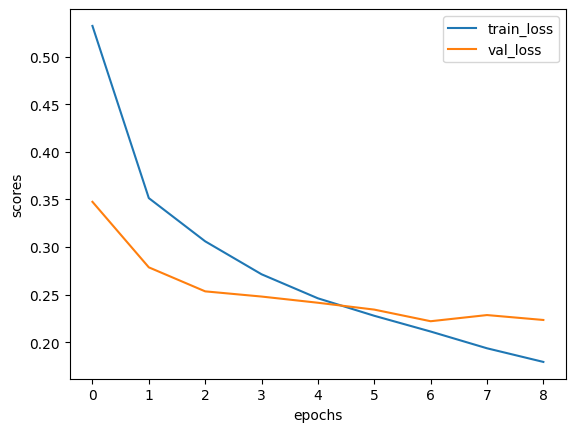

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('scores')
plt.show()

#3장 시작

In [21]:
model = keras.models.load_model('best_cnn_model.h5')

model.predict(train_scaled)
model.evaluate(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9459 - loss: 0.1454


[0.14910168945789337, 0.9439791440963745]

훈련 전 후 가중치 비교하기

In [5]:
conv= model.layers[0] #컨볼루전 레이어 하나
conv_weights = conv.weights[0].numpy() #컨볼루전 레이어의 weights들 (절편 제외)

print("컨볼루전 레이어 가중치값 길이 : ", len(conv.weights))
print("weights shape : ", conv.weights[0].shape, "\t bias' shape : ", conv.weights[1].shape)
print("weights 들의 평균 : ", conv_weights.mean(), "\t weights들의 표준편차 : ", conv_weights.std())

컨볼루전 레이어 가중치값 길이 :  2
weights shape :  (3, 3, 1, 32) 	 bias' shape :  (32,)
weights 들의 평균 :  -0.032725066 	 weights들의 표준편차 :  0.2631745


In [6]:
import numpy as np

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (28, 28, 1)))

no_training_conv = no_training_model.layers[0] #훈련하지 않은 컨볼루전 레이어
print(no_training_conv.weights[0].shape) #훈련하지 않은 layers의 weights shape

no_training_weights = no_training_conv.weights[0].numpy()
print("가중치 평균 : ",np.mean(no_training_weights), "가중치 표준편차 : ", np.std(no_training_weights))

(3, 3, 1, 32)
가중치 평균 :  0.002200326 가중치 표준편차 :  0.08390239


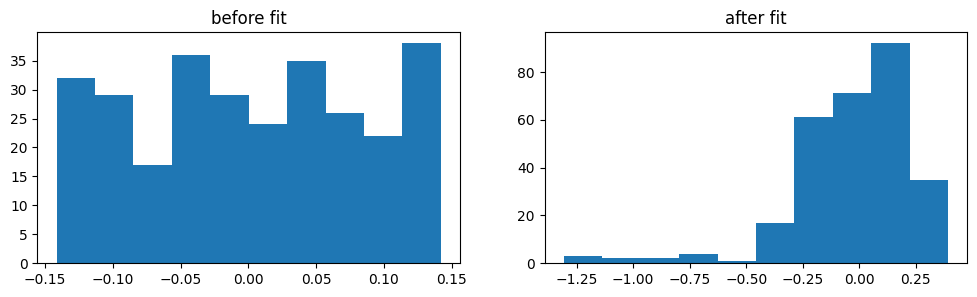

In [7]:
fig, axs = plt.subplots(1,2, figsize = (12,3))
axs[0].hist(no_training_weights.reshape(-1, 1))
axs[0].set_title("before fit")
axs[1].hist(conv_weights.reshape(-1,1))
axs[1].set_title("after fit")

plt.show()

훈련 전 후 가중치 시각화

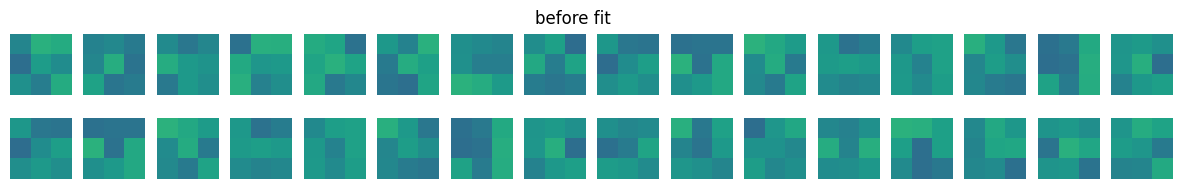

In [8]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
fig.suptitle("before fit")
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,:,i*8 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

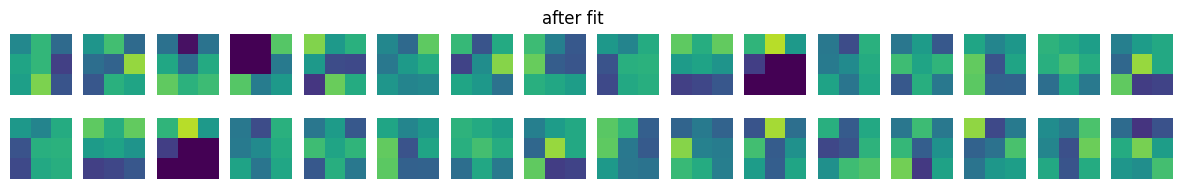

In [9]:
fig, axs = plt.subplots(2, 16,figsize = (15,2))
fig.suptitle('after fit')
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,:,i*8 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

#함수형 API 사용해 중간 과정 시각화

In [36]:
inputs = keras.Input(shape=(28,28,1))
conv1 = keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same')(inputs)
maxpool1 = keras.layers.MaxPooling2D(2)(conv1)
conv2 = keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same')(maxpool1)
maxpool2 = keras.layers.MaxPooling2D(2)(conv2)
flat = keras.layers.Flatten()(maxpool2)
dense1 = keras.layers.Dense(100, activation='relu')(flat)
drop = keras.layers.Dropout(0.4)(dense1)
outputs = keras.layers.Dense(10, activation='softmax')(drop)

model = keras.Model(inputs, outputs)
model.layers

[<InputLayer name=input_layer_6, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_7, built=True>]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


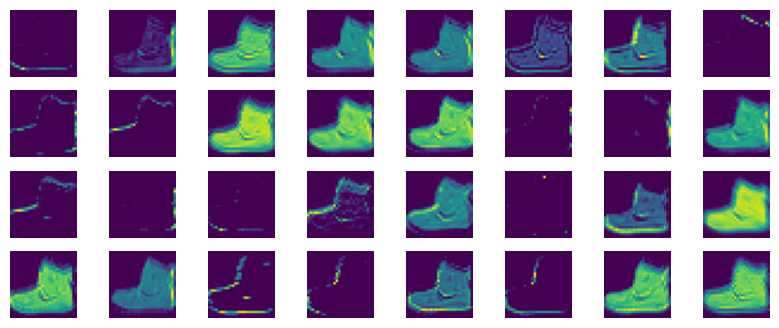

In [44]:
conv_acti = keras.Model(model.input, model.layers[1].output)
data = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

res = conv_acti.predict(data)
res.shape

fig, axs = plt.subplots(4, 8, figsize = (10,4))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(res[0,:,:,i*8+j])
    axs[i, j].axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


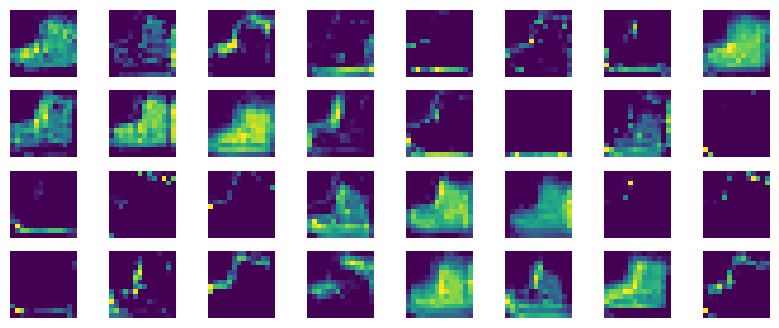

In [45]:
conv_acti2 = keras.Model(model.input, model.layers[3].output)
data = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

res = conv_acti2.predict(data)
res.shape

fig, axs = plt.subplots(4, 8, figsize = (10,4))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(res[0,:,:,i*8+j])
    axs[i, j].axis('off')

In [51]:
model._input_layers[0]

AttributeError: 'Functional' object has no attribute '_input_layers'